In [1]:
import astropy.units as u
import numpy as np
from fil_finder import FilFinder2D
from astropy.io import fits
from scipy.optimize import minimize
from tqdm.notebook import tqdm
import os
import shutil
from pathlib import Path
import glob
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from astropy import stats

from astropy.io import fits 
from astropy import wcs
from astropy.wcs import WCS

In [2]:
def plot(images, n, sigma):
    
    """
    This will plot n of the cuts in order to check that they have been sorted correctly.
    They are sigma clipped an equal ammount to the processing they undergo before being fed into the GAN and CNN to ensure
    they are high quality.
    
    Low quality images (very off centre, too faded, too ambiguous) are removed
    """
    pbar = tqdm(total=n)
    num = n
    cols = 6
    rows = (num+cols-1)//cols

    plt.figure(figsize=(cols*4, rows*4))
    
    for i in range(num):
        file = images[i]
        
        hdu = fits.open(file)[0]
        image = hdu.data.squeeze() 
        wcs = WCS(hdu.header)
        
        mean, median, std = stats.sigma_clipped_stats(image, sigma=sigma)
        image[image < median+sigma*std] = median+sigma*std
        image = 2*((image-np.min(image))/np.ptp(image))-1
        image = np.where(np.isnan(image), 0, image)  
        
        ax = plt.subplot(rows, cols, i+1, projection=wcs)
        plt.imshow(image, cmap='inferno', origin='lower')
        plt.title(file[file.find('cut'):])
        pbar.update(1)
        plt.axis('off')
    
    plt.show()

In [3]:
files1 = []
i = 0
pbar = tqdm(total=61844)
while i < 61844:
    if Path(r"Raw Data\Filaments\cut{}.fits".format(i)).is_file():
        files1.append(r"Raw Data\Filaments\cut{}.fits".format(i))
    else:
        pass
    i+=1
    pbar.update(1)
    
files2 = []
j = 0
pbar = tqdm(total=61844)
while j < 61844:
    if Path(r"Raw Data\Not Filaments\cut{}.fits".format(j)).is_file():
        files2.append(r"Raw Data\Not Filaments\cut{}.fits".format(j))
    else:
        pass   
    j+=1
    pbar.update(1)
    
files3 = []
j = 0
pbar = tqdm(total=61844)
while j < 61844:
    if Path(r"Raw Data\Also Not Filaments\cut{}.fits".format(j)).is_file():
        files3.append(r"Raw Data\Also Not Filaments\cut{}.fits".format(j))
    else:
        pass   
    j+=1
    pbar.update(1)


  0%|          | 0/61844 [00:00<?, ?it/s]

  0%|          | 0/61844 [00:00<?, ?it/s]

  0%|          | 0/61844 [00:00<?, ?it/s]

In [5]:
for i in range(len(files1)):
    file = files1[i]
    
    hdu = fits.open(file)[0]
    plt.figure(figsize=(4,6))
    wcs = WCS(hdu.header)
    plt.subplot(projection=wcs) 
    plt.imshow(hdu.data, origin='lower') 
    plt.title(file[file.find('cut'):])
    #plt.grid(color='k', ls='solid')
    plt.show()

In [6]:
#entire scidata image
# FP = [170,1409,1413,1423,1490,1574,1621,1753,1924,1925,2106,2189,2206,2294,2438,2451,2457,2608,2622,2698,2881,3319,3398,4068,4161,4509,4519,4575,5248,5510,5891,6064,6146,6325,6396,6414,6498,6499,6501,6828,6829,6837,6904,6912,6915,7000,7074,7081,7083,7085,7086,7087,7088,7167,7168,7169,7184,7254,7255,7256,7259,7269,7331,7338,7339,7402,7417,7418,7419,7423,7424,7424,7512,7514,7515,7530,7592,7593,7608,7610,7612,7615,7615,7673,7679,7680,7682,7683,7695,7696,7699,7768,7769,7774,7775,7780,7782,7783,7784,7785,7786,7790,7791,7801,7869,7870,7930,7930,7974,8026,8124,8131,8133,8141,8221,8230,8294,8300,8304,8306,8316,8369,8370,8372,8387,8392,8462,8472,8548,8556,8557,8558,8560,8584,8644,8646,8983,8984,8991,8995,9077,9078,9155,9156,9248,9335,9419,9446,9498,9588,9589,9683,9688,9696,9771,9844,9921,10001,10002,10003,10007,10015,10024,10080,10081,10084,10085,10166,10167,10168,10169,10170,10171,10172,10173,10183,10192,10196,101200,10220,10221,10252,10254,10256,10257,10305,10337,10347,10375,10444,10883,11220,11222,11401,11487,11574,129,130,216,302,477,642,655,736,737,738,820,981,991,1063,1064,1066,1067,1087,1095,1142,1143,1150,1151,1165,1181,1223,1238,1239,1249,1250,1252,1289,1313,1319,1320,1321,1323,1324,1327,1334,1336,1400,1401,1405,1406,1407,1420,1422,1483,1484,1491,1492,1503,1508,1577,1578,1582,1666,1667,1670,1746,1752,1764,1770,1825,1828,1835,1837,1838,1841,1850,1852,1856,1912,1918,1919,1921,1927,1928,1929,1929,1930,1935,1936,1997,1999,2003,2007,2008,2009,2012,2013,2019,2021,2022,2023,2024,2027,2077,2091,2128,2178,2179,2180,2181,2262,2263,2271,2279,2283,2284,2285,2286,2350,2362,2363,2365,2447,2456,2534,2538,2541,2710,2715,2785,2790,2794,2796,2797,2884,2885,2891,2970,3133,3134,3136,3226,3227,3236,3332,3405,3410,3411,3571,2642,3733,3739,3915,3918,3927,3938,3997,3998,4004,4011,4087,4088,4093,4097,4146,4154,4155,4159,4165,4230,4231,4232,4233,4240,4241,4242,4244,4245,4263,4270,4318,4319,4320,4321,4322,4323,4324,4337,4343,4347,4349,4366,4404,4405,4406,4407,4408,4409,4410,4411,4412,4427,4441,4457,4458,4489,4490,4491,4494,4495,4496,4497,4498,4499,4543,4577,4578,4579,4580,4582,4586,4596,4603,4605,4614,4663,4664,4671,4682,4690,4690,4698,4703,4708,4718,4788,4843,4862,4875,4937,4946,4949,4961,4962,5055,5057,5123,5126,5373,5375,5377,5383,5463,5549,5555,5635,5640,5640,5707,5717,5718,5720,5721,5725,5730,5812,5838]
# FN = [1408,2111,2199,2201,2278,2279,2366,2368,2447,2724,2797,2875,2961,2966,2972,2973,3050,3056,3122,3145,3154,3155,3218,3245,3246,3325,3339,3340,3669,3753,3814,3846,3847,4274,4537,4711,4885,4962,655,642,737,981,1066,1067,1064,1067,1087,1151,1165,1249,1252,1669,1670,1838,1841,1842,1846,1912,1919,1929,1935,1997,2007,2019,2109,2125,2128,2178,2179,2180,2181,2189,2191,2196,2200,2204,2205,2206,2211,2262,2263,2271,2272,2276,2279,2280,2283,2285,2287,2350,2365,2447,2456,2553,2710,2791,2792,2788,2794,2798,2809,2810,2811,2859,2876,2891,2904,2906,2962,3052,3129,3134,3159,3244,3410,3579,3642,3733,3745,3748,3752,3755,3757,3831,3832,3834,3913,3927,3938,4087,4146,4154,4155,4159,4165,4233,4241,4242,4240,4244,4245,4266,4320,4337,5471,5635,5640,5717,5718,5720,5721,5891,6146,6325,6396,6414,4343,4349,4362,4408,4409,4412,4491,4494,4495,4498,4514,4519,4535,4543,4577,4580,4605,4671,4698,4708,4718,4875,5055,5057,5381,5385,6498,6501,6828,6829,6915,7074,7081,7083,7086,7087,7088,7167,7168,7169,7184,7254,7255,7256,7259,7261,7269,7402,7417,7418,7419,7423,5707,7512,7514,7515,7516,7530,7592,7606,7608,7610,7673,7679,7680,7682,7683,7692,7695,7696,7768,7769,7774,7775,7782,7783,7784,7786,7790,7791,7797,78711,7872,7873,7874,7896,7897,7953,7973,7974,8026,8032,8036,8054,8119,8120,8121,8124,8128,8133,8141,8300,8369,8370,8372,8387,8400,8454,8462,8481,8553,8556,8558,8560,8638,8644,8653,8659,8666,8721,8743,8752,8753,8811,8969,8984,8983,8991,8995,8999,9077,9078,9102,9156,9239,9314,9419,9427,9430,9510,9511,9513,9516,9517,9518,9593,9588,9589,9679,9683,9681,9682,9685,9688,9994,10001,10002,10003,10007,10015,110023,10024,10084,10085,10125,10168,10172,10173,10196,10200,10204,10208,10220,10221,10252,10254,10385,11220,11222,11401,11574]
# Remove = [2199,2109,7436,2185,2186,2197,2097,2964,2966,3206,8856,9517,1588,1669,1674,1677,1683,1931,2045,2046,2463,2791,2876,3044,3051,3057,3152,3211,3302,3312,3493,3662,3742,3744,3848,4606,7137,7607,7872,8122,8400,8402,8635,8652,8659,9063,9587,9590,10551,1590,1684,1762,1932,2369,2366,2367,2471,2553,2623,2628,2641,2709,2724,2788,2875,2795,2904,2965,3145,3219,3235,3321,3386,3898,3907,4006,3924,4078,4092,4183,4177,4264,4344,4428,4443,4514,4876,4885,7170,7357,7524,7606,8043,8128,8134,8214,8224,8286,8287,8373,8390,8553,8573,8666,8726,8821,8909,8969,8999,9058,9073,9099,9148,9243,9245,9337,9403,9424,9427,9503,9510,9580,9604,9661,9668,9839,10112,10204,10210,10383,10618,10707,10722,10894,11229,1408,1591,1842,1844,1851,2095,2624,2809,2874,2962,2961,2973,3052,3154,3156,3218,3223,3748,3755,5381,5382,5385,7261,7516,7692,7972,7973,8035,8385,8638,8653,8736,9314,9681,9687,1591,1499,2207,2209,2210,2798,3155,3245,7951,7073,8034,8127,8215,8225,8569,8721,8900,9102,9430,9511,9518,9682,9993,10031,10385,3492,2212,2272,2273,1592,1592,1668,2098,2099,2107,2125,2184,2201,2211,2278,2280,2287,2288,2375,2692,2701,2699,2717,2722,2792,2793,2810,2811,2859,2860,2861,2906,2947,2972,3050,3056,3061,3129,3147,3159,3244,3246,3303,3304,3305,3322,3325,3340,3401,3406,3407,3579,3580,3642,3655,3726,3745,3752,3757,3814,3830,3833,3846,3847,4266,4274,4362,4424,4537,4710,5471,7161,7162,7347,7796,7797,7806,7873,7874,7896,7897,8032,8054,8056,8119,8120,8121,8216,8220,8391,8454,8466,8481,8741,8743,8752,8806,9239,9251,9516,9685,9845,9847,9994,10200,10208]

#redued scidata image
FP = [9495,7321,2982,2767,176,246,461,532,600,602,736,797,807,926,932,935,947,965,1002,1005,1008,1017,1020,1065,1066,1071,1079,1088,1089,1092,1146,1158,1210,1212,1228,1278,1281,1283,1285,1286,1287,1358,1417,1418,1422,1436,1485,1492,1496,1500,1505,1506,1507,1510,1513,1561,1575,1581,1631,1636,1637,1646,1647,1648,1649,1653,1712,1714,1843,1847,1848,1861,1923,1925,1982,1995,2064,2071,2074,2089,2134,2136,2138,2182,2189,2207,2211,2247,2268,2270,2276,2277,2278,2281,2338,2345,2346,2348,2349,2351,2496,2548,2549,2557,2620,2624,2626,2627,2629,2631,2632,2692,2694,2695,2696,2697,2761,2761,2768,2907,2908,2909,2922,2983,3030,3043,3052,3117,3185,3186,3254,3257,3267,3318,3329,3333,3397,3438,3439,3445,3453,3454,3461,3467,3472,3510,3511,3513,3514,3515,3516,3581,3582,3586,3587,3588,3609,3610,3635,3650,3651,3659,3676,3683,3723,3726,3740,3750,3799,3817,3846,3871,3890,3958,4026,4240,4310,4373,4382,4383,4445,4448,4656,4661,4661,4735,4865,5080,5222,5222,5291,5496,5566,5616,5624,5627,5636,5637,5654,5693,5694,5696,5706,5708,5763,5768,5776,5777,5778,5780,5831,5832,5835,5836,5837,5899,5906,5907,5917,5918,5964,5968,5970,5971,5973,5988,6033,6034,6035,6036,6040,6102,6105,6108,6112,6114,6174,6177,6183,6197,6199,6200,6241,6244,6250,6251,6257,6264,6265,6266,6267,6268,6270,6330,6336,6337,6342,6391,6395,6403,6404,6405,6413,6537,6538,6549,6551,6612,6613,6616,6620,6620,6621,6673,6680,6683,6684,6685,6689,6752,6753,6756,6757,6758,6760,6770,6780,6825,6832,6833,6878,6892,6893,6899,6954,6961,6963,6965,6977,7036,7038,7098,7170,7176,7185,7307,7309,7311,7313,7386,7387,7390,7392,7451,7456,7459,7460,7479,7521,7526,7527,7532,7597,7599,7610,7651,7667,7668,7735,7738,7739,7742,7743,7796,7810,7815,7883,7895,7897,7944,7945,7955,7956,7957,8007,8012,8016,8087,8097,8104,8128,8129,8138,8143,8158,8160,8167,8200,8201,8204,8209,8230,8271,8271,8272,8273,8274,8298,8325,8345,8346,8347,8348,8393,8397,8409,8413,8416,8419,8430,8438,8462,8481,8500,8575,8642,8715,8719,8720,8796,8813,8857,8859,8863,8927,8931,8997,9072,9078,9136,9141,9206,9212,9310,9351,9354,9382,9412,9489,9492,9495]
FN = [1144,1281,1292,1294,1357,1362,1365,1372,1703,1788,1789,1848,2081,2268,2281,2338,2339,2409,2410,2484,2571,2572,2618,2619,2623,2635,2985,3135,3191,3259,3332,3556,3695,6058,6059,6432,6547,6554,7028,7051,7058,7297,7320,7327,7749,7809,7881,7953,8216]
Dont_rotate = [7879,8021,2412,2476,2606,2616,2684,2685,2754,6891,7745,895,1138,1282,1295,1707,1708,1776,1854,1855,1863,1864,2213,2289,2291,2323,2325,2370,2395,2470,2493,2542,2646,2687,2706,2915,3554,3600,3697,3838,5979,5981,6052,6358,6406,6407,6408,6409,6471,6692,6813,6831,6849,6905,6981,7102,7112,7128,7181,7249,7330,7519,7531,7601,7673,7748,7820,8015,8312,8457,8801,1294,1365,1572,1705,1706,1715,1777,1778,1853,2007,2272,2324,2413,2563,2564,2568,2619,2688,2705,2775,2776,3121,3261,3482,3536,3552,3604,3670,3674,3695,3901,5834,5989,6190,6191,6622,7253,7375,7443,7520,8314,8384,8455,8527,8870]
Remove = [2410,2414,2621,4041,5909,6686,6696,7953,1781,2205,2410,2985,3053,3191,3262,4041,5909,6545,6686,6696,7030,7051,7058,7336,7523,7749,7752,7953,1144,1145,1292,1299,1362,1372,1736,1926,1927,2081,2135,2140,2153,2204,2275,2339,2409,2484,2489,2571,2572,2618,2623,3046,3135,3196,3259,3403,6058,6059,6432,6463,6492,6540,6611,6687,6697,7097,7297,7327,7370,7371,7672,7751,7871,7872,7881,7887,8232]


false_positive = 0
false_negative = 0

for i in FP:
    if Path(r"Raw Data\Filaments\cut{}.fits".format(i)).is_file():
        false_positive +=1    
    else:
        pass
    
for i in FN:
    if Path(r"Raw Data\Not Filaments\cut{}.fits".format(i)).is_file():
        false_negative +=1
    else:
        pass

print("Number of false positivess = {}, {}".format(false_positive, len(FP)))
print("Number of false negatives = {}, {}".format(false_negative, len(FN)))
print("Number of Dont_rotate = {}".format(len(Remove)))

Number of false positivess = 0, 411
Number of false negatives = 5, 49
Number of Dont_rotate = 77


In [17]:
#Overpopulate the "0" dataset with false positives

#j = 9520
for i in FP:
    shutil.copyfile(r"Raw Data\Cuts\cut{}.fits".format(i), r"Raw Data\Also Not Filaments\cut{}.fits".format(j))
    j+=1

In [14]:
for i in FP:
    if Path(r"Raw Data\Filaments\cut{}.fits".format(i)).is_file():
        shutil.copyfile(r"Raw Data\Filaments\cut{}.fits".format(i), r"Raw Data\Not Filaments\cut{}.fits".format(i))
        os.remove(r"Raw Data\Filaments\cut{}.fits".format(i))

In [7]:
for i in FN:
    if Path(r"Raw Data\Not Filaments\cut{}.fits".format(i)).is_file():
        shutil.copyfile(r"Raw Data\Not Filaments\cut{}.fits".format(i), r"Raw Data\Filaments\cut{}.fits".format(i))
        os.remove(r"Raw Data\Not Filaments\cut{}.fits".format(i))

In [19]:
for i in Dont_rotate:
    if Path(r"Raw Data\Filaments\cut{}.fits".format(i)).is_file():        
        shutil.copyfile(r"Raw Data\Filaments\cut{}.fits".format(i), r"Raw Data\Dont_rotate\cut{}.fits".format(i))
        os.remove(r"Raw Data\Filaments\cut{}.fits".format(i))
    
    if Path(r"Raw Data\Not Filaments\cut{}.fits".format(i)).is_file():        
        shutil.copyfile(r"Raw Data\Not Filaments\cut{}.fits".format(i), r"Raw Data\Dont_rotate\cut{}.fits".format(i))
        os.remove(r"Raw Data\Not Filaments\cut{}.fits".format(i))
    else:
        pass

In [20]:
for i in Remove:
    if Path(r"Raw Data\Filaments\cut{}.fits".format(i)).is_file():        
        os.remove(r"Raw Data\Filaments\cut{}.fits".format(i))
    
    if Path(r"Raw Data\Not Filaments\cut{}.fits".format(i)).is_file():        
        os.remove(r"Raw Data\Not Filaments\cut{}.fits".format(i))

In [6]:
#Checking the removed filaments for certainty.

deleted = []
for i in range(len(Remove)):
    if Path(r"Raw Data\Filaments\cut{}.fits".format(Remove[i])).is_file():
        pass
    else:
        deleted.append(r"Raw Data\Cuts\cut{}.fits".format(Remove[i]))

  0%|          | 0/77 [00:00<?, ?it/s]

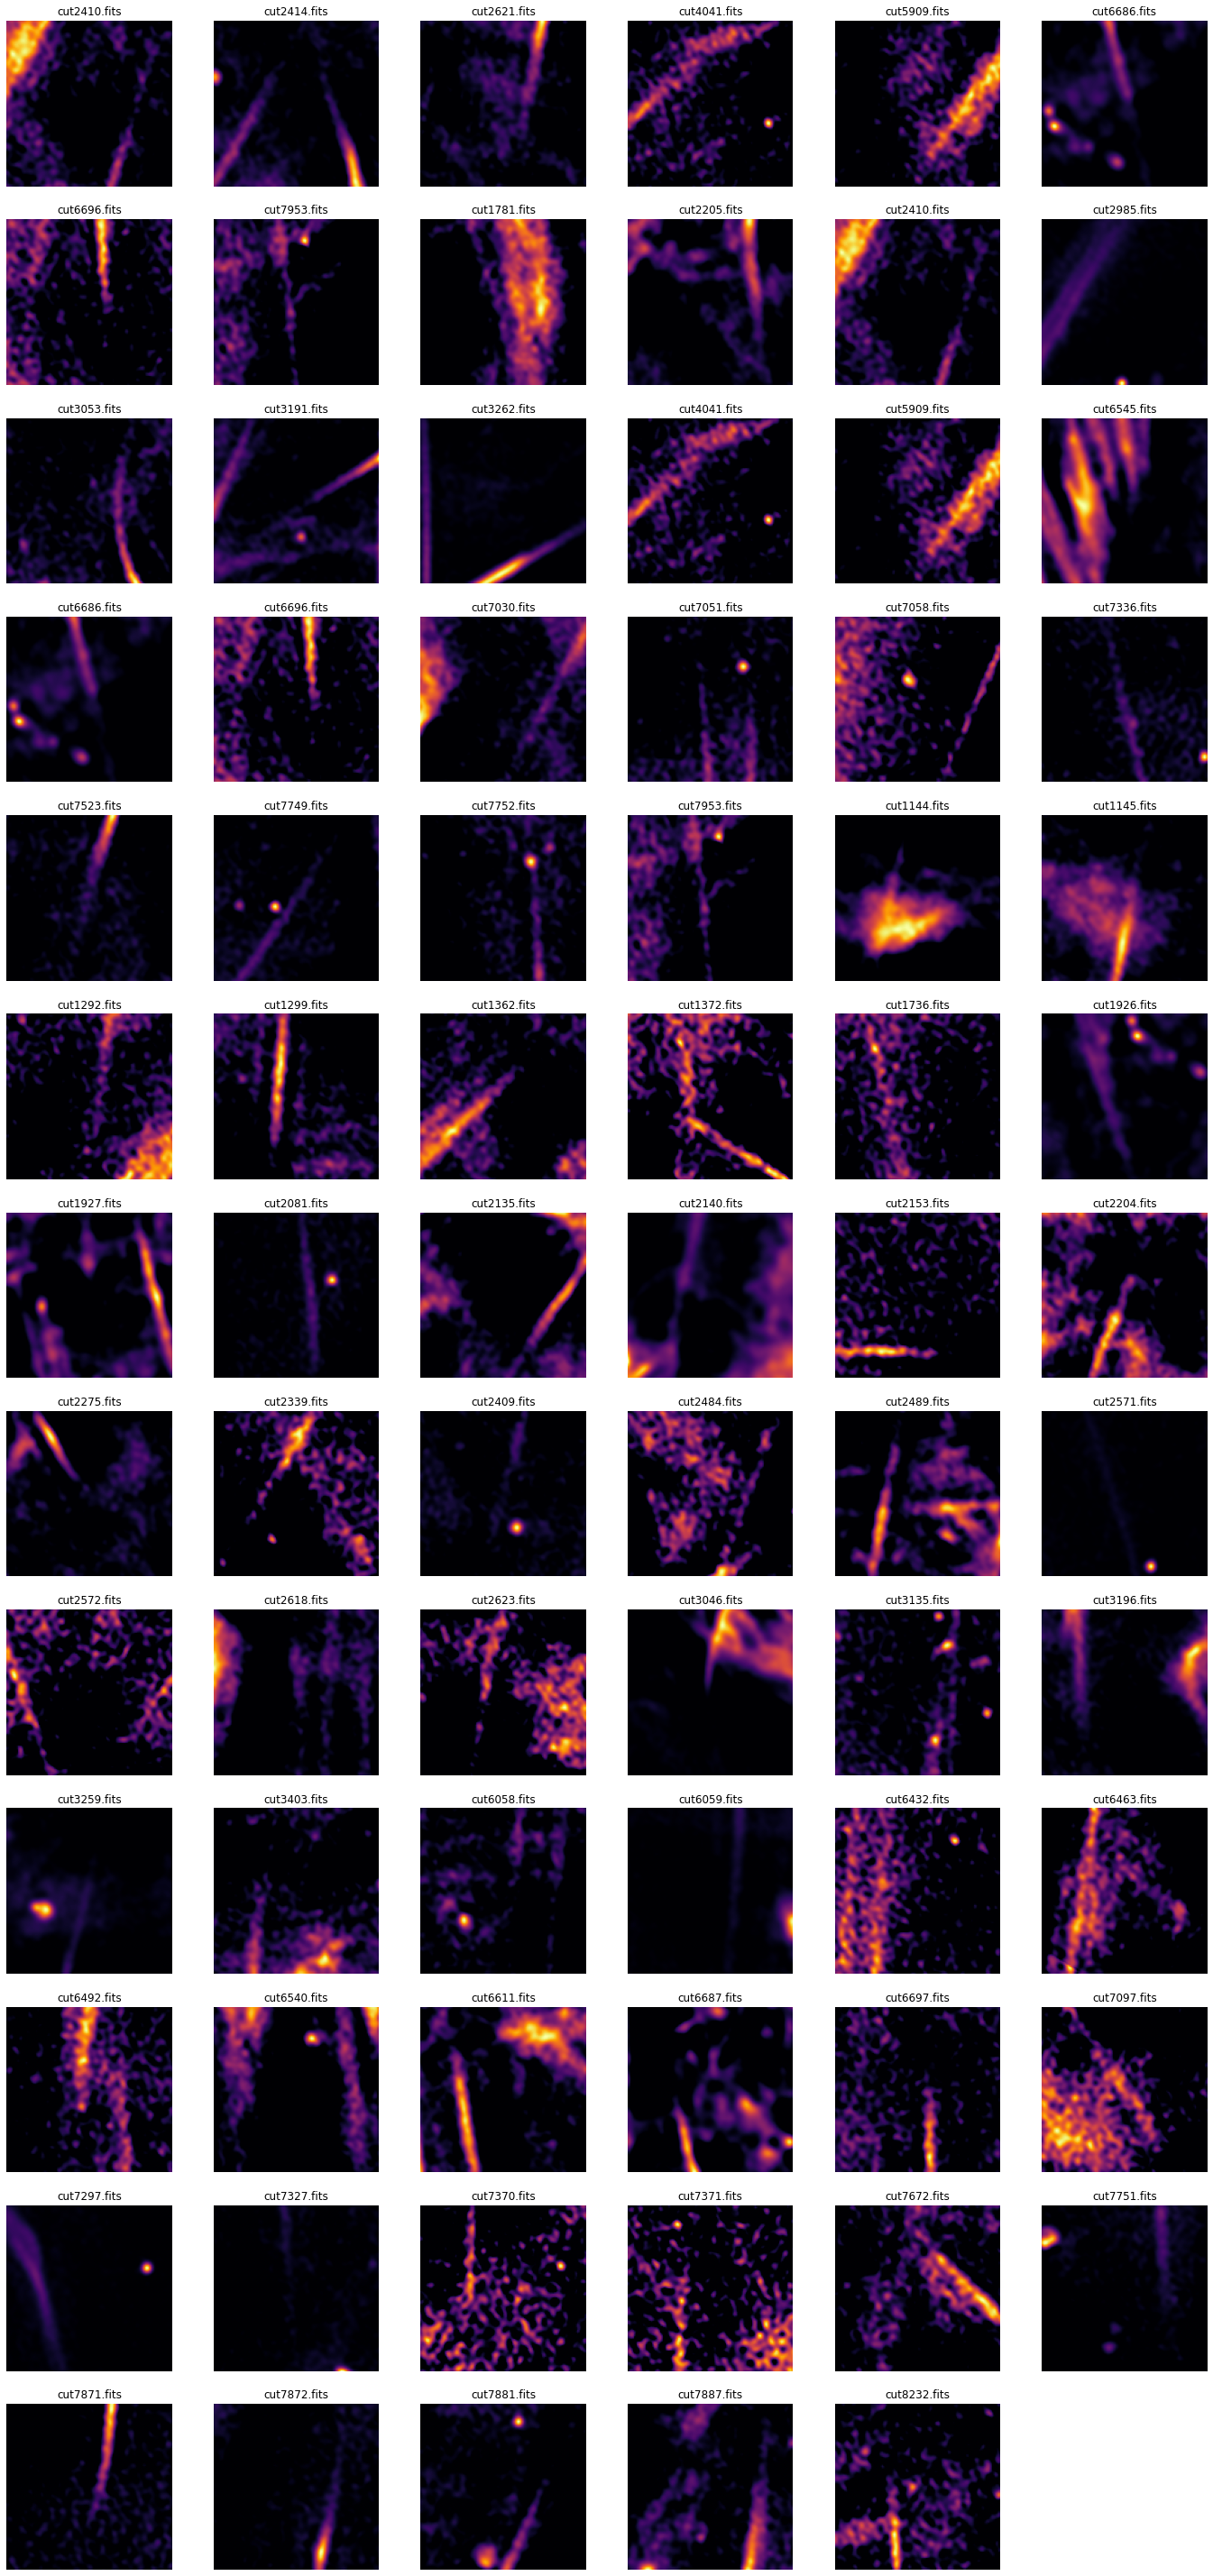

In [7]:
plot(deleted, len(deleted), 1)

In [9]:
#Restoring some filaments which are good enough.

Restore = [2410,2414,2621,4041,5909,6686,6696,7953,1781,2205,2410,2985,3053,3191,3262,4041,5909,6545,6686,6696,7030,7051,7058,7336,7523,7749,7752,7953,1145,1292,1299,1362,1372,1736,1926,1927,2081,2135,2140,2153,2339,2484,2489,2572,2618,2623,3046,3135,3196,3259,3403,6058,6059,6432,6463,6492,6540,6611,6687,6697,7097,7297,7370,7371,7672,7751,7871,7872,7881,7887,8232]

In [10]:
for i in Restore:
    if Path(r"Raw Data\Cuts\cut{}.fits".format(i)).is_file():
        shutil.copyfile(r"Raw Data\Cuts\cut{}.fits".format(i), r"Raw Data\Filaments\cut{}.fits".format(i))
    else:
        pass